In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import glob
import os
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
#Pull in every excel sheet from the current folder that starts with Calendar and ends in xlsx. YMMV!

all_data = pd.DataFrame()
for f in glob.glob('./data/TeamMemb*.xlsx'):
    df = pd.read_excel(f, header=1, encoding='UTF-8')
    year = os.path.basename(f).split('.')[0].split('_')[-1]
    df['Season'] = year
    all_data = all_data.append(df,ignore_index=True)
    
all_data.head()

,Function,Last Name,First Name,Birth date,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Season
0,Rider,AALDERS,Bram,06/06/1987,Male,CTM,NED,EUR,UBB,UBBINK-SYNTEC CYCLING TEAM,10003254029,2006
1,Rider,ABAKOUMOV,Igor,30/05/1981,Male,CTM,BEL,EUR,JAR,JARTAZI-7MOBILE,10002241387,2006
2,Rider,ABE,Yoshiyuki,15/08/1969,Male,PCT,JPN,ASI,SKS,SKIL-SHIMANO,10001136395,2006
3,Rider,ABELLAN OSSENBACH,Carlos,01/03/1983,Male,PRO,ESP,EUR,AWT,ASTANA,10002733764,2006
4,Rider,ABRAHAM,Emile,28/04/1974,Male,CTM,TTO,AME,AEG,AEG TOSHIBA-JETNETWORK PRO CYCLING TEAM,10002156111,2006


In [42]:
all_data.Category.unique()

array(['CTM', 'PCT', 'PRO', 'CTW', 'WTT'], dtype=object)

In [46]:
CTM = all_data.loc[all_data['Category']=='CTM',['Team Name','Season']].groupby('Season').count()
PCT = all_data.loc[all_data['Category']=='PCT',['Team Name','Season']].groupby('Season').count()
PRO = all_data.loc[all_data['Category']=='PRO',['Team Name','Season']].groupby('Season').count()
CTW = all_data.loc[all_data['Category']=='CTW',['Team Name','Season']].groupby('Season').count()
WTT = all_data.loc[all_data['Category']=='WTT',['Team Name','Season']].groupby('Season').count()


df_team_counts = pd.DataFrame({'Continental':CTM,
                               'PCT':PCT,
                               'PRO':PRO,
                               'CTW':CTW,
                               'WTT':WTT})
df_team_counts

ValueError: If using all scalar values, you must pass an index

In [40]:
riders = all_data.groupby(['Season','Continent'])['UCIID'].count().unstack('Season').transpose()
riders

Continent,AFR,AME,ASI,EUR,OCE
Season,,,,,
2005,26,263,129,1875,86
2006,19,332,147,2435,129
2007,20,440,167,2576,128
2008,50,394,196,2314,172
2009,56,280,217,2270,171
2010,31,270,243,2184,136
2011,57,368,304,2140,186
2012,96,430,378,2389,166
2013,54,418,387,2404,164


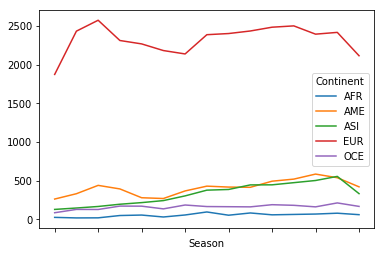

In [41]:
riders.plot(kind='line')